# Attempt to building ANN for Self-Driving Car

Plan Of Attack:
    - Greyscale all images (144 x 176)
    - Resize to 72x88 (MAYBE)
    - Then flatten to 6336 (if 72x88 resize)
    - Create Labels for them [forward, left, right] [1,0,0] or [0,1,0] or [0,0,1]
    - Store flattened images and labels together - corresponsingly
    - Use Tutotail of MNIST Multi-Layer Perceptron to create the ANN

In [1]:
#Machine Learning Library
import tensorflow as tf
import matplotlib.pyplot as plt
#Mathematical and Array libaray
import numpy as np
#Image import library
from scipy import misc
#Image transformation library
from skimage.transform import resize

## Step 1 - Getting all of our images

    - Import images
    - Resize images
    - Add images to the array

In [3]:
import glob
f_image_list = []
img_count = 0
path = 'C:/Users/Hannan Saleemi/Desktop/Self-Driving Car/cardataset/training_set/Forward/'
for filename in glob.glob(path+'*.png'):
    img_count += 1
    image = misc.imread(path+'trainframe ('+str(img_count)+').png')
    image_resized = resize(image, (72,88), mode='reflect')
    f_image_list.append(image_resized)

In [4]:
# JUST TESTING: Images are resized to 72x88 and 3d RGB
print(image_resized.shape)

(72, 88, 3)


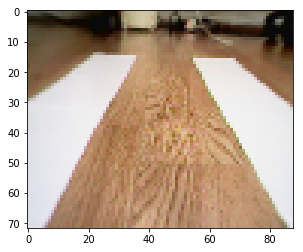

In [5]:
#Example of an image
plt.imshow(image_resized, cmap='Greys')
plt.show()

## Step 2 - Converting the images to greyscale and storing them in a new array

    - The greyscale function is created
    - An empty array is initialised

In [6]:
# Lets try and convert ALL images to greyscale
def weightedAverage(pixel):
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

# Init the empty array
grey = np.zeros((3000, image_resized.shape[0], image_resized.shape[1]))       # Spots for 3000 72x88 images

In [8]:
#Putting all the images through the conversion:
for image_num in range(len(f_image_list)):
    for rownum in range(len(f_image_list[image_num])):
        for colnum in range(len(f_image_list[image_num][rownum])):
            grey[image_num][rownum][colnum] = weightedAverage(f_image_list[image_num][rownum][colnum])
    if image_num % 100 == 0:
        print("Finished image",(image_num))

Finished image 0
Finished image 100
Finished image 200
Finished image 300
Finished image 400
Finished image 500
Finished image 600
Finished image 700
Finished image 800
Finished image 900
Finished image 1000
Finished image 1100
Finished image 1200
Finished image 1300
Finished image 1400
Finished image 1500
Finished image 1600
Finished image 1700
Finished image 1800
Finished image 1900
Finished image 2000
Finished image 2100
Finished image 2200
Finished image 2300
Finished image 2400
Finished image 2500
Finished image 2600
Finished image 2700
Finished image 2800
Finished image 2900


In [9]:
#Checking out the new shape of the array
grey.shape

(3000, 72, 88)

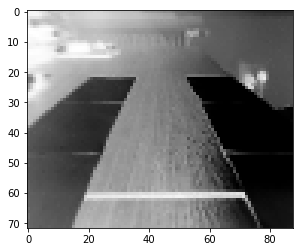

In [19]:
# Plotting an image to check greyscale conversion
plt.imshow(grey[300], cmap='Greys')
plt.show()

## Step 3 - Reshaping the array to be in the same format as the MNIST array
    - format (3000, (72x88))

In [86]:
f_images = grey.reshape(3000,6336)

In [87]:
#Checking out the new shape of the array
len(f_images)
f_images.shape

(3000, 6336)

## Step 4 - Labelling the data

    - Each data needs the corresponsing label - This is just a test - this data won't actually be used
    - label format [forward,left,right]
    - so for this set it's [1,0,0]
    - shape=(rows,columns)

In [64]:
#Init the empty array of zeros - 3000 rows and 3 columns
labels_y = np.zeros(shape=(3000,3))

In [66]:
# Add the forward labels to all images [1,0,0]
for i in range(3000):
    labels_y[i][0] = float(1)

In [84]:
#Checking the labels
print(labels_y)
print(len(labels_y))

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 ..., 
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]
3000


## Step 5 - Nomalisation?

### You ONLY need to normalise if the input image is in RGB - if it is in grey, it is already on a scale from 0 - 1

In this case, no need to normalise

## Step 6 - Random Shuffling of the data and labels test

In [ ]:
from sklearn.utils import shuffle
import numpy as np
x = np.array([1,2,3])
t = np.array(['one','two','three'])
x, t = shuffle(x, t, random_state=1000)

In [89]:
f_images

3000

In [91]:
labels_y

3000

In [111]:
batchx = f_images[0:100]


In [112]:
len(batchx)

100

In [113]:
batchx

array([[ 0.08531569,  0.08270392,  0.08433529, ...,  0.27870588,
         0.27692549,  0.26649216],
       [ 0.08525098,  0.08377059,  0.08318431, ...,  0.28180588,
         0.2746451 ,  0.26879216],
       [ 0.08736078,  0.08475098,  0.08287451, ...,  0.27876078,
         0.27933333,  0.26615882],
       ..., 
       [ 0.08483529,  0.08276863,  0.08283137, ...,  0.2876902 ,
         0.27854706,  0.27739412],
       [ 0.08679608,  0.08368431,  0.08222353, ...,  0.28548039,
         0.27866078,  0.27539804],
       [ 0.08422745,  0.08418431,  0.08483529, ...,  0.28923333,
         0.28110392,  0.27391961]])